# Relationships between stats in Pokemon

Pandas Data Science Project 1

Jenna deBoisblanc

October 18, 2019

Advanced Topics in Computer Science and Making

Isidore Newman School

I used a dataset of all the pokemon from the first six generations of pokemon including the stats for each pokemon:

  /#        Name Type_1  Type_2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1  2     Ivysaur  Grass  Poison    405  60      62       63       80       80   
2  3    Venusaur  Grass  Poison    525  80      82       83      100      100   
3  4  Charmander   Fire     NaN    309  39      52       43       60       50   
4  5  Charmeleon   Fire     NaN    405  58      64       58       80       65   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     65           1      False  
4     80           1      False  


I created a function to determine the two stats with the strongest relationship based on r value and slope.  This turned out to be Special Defense and Attack.

My research question was "Which stats increase or decrease proportionally to each other?"

I first made a function def compare_stats which takes any two stats columns and plot them against each other for each pokemon.  Then I added a Least Squared Regression Line and line of code which tells me important statistical information such as the r value, and slope of the LSQR line.  Finally I used a for loop to call that function for every possible combination of stats and determine the one with the 'best' relationship.  




In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress

df = pd.read_csv('Pokemon_nomega.csv')
avg = df.Total.mean()

%matplotlib notebook
%matplotlib inline

# Compare Stats

In [9]:
def compare_stats(Stat_1, Stat_2, show):
    df_Adj = df.copy()
    if (Stat_1 == '#' or Stat_2 == '#'):
        df_Adj[Stat_1] = df[Stat_1]
        df_Adj[Stat_2] = df[Stat_2]
        if (Stat_1 == 'Name'):
            for i in range(len(df.Name)):
                df_Adj.loc[i, 'Name'] = len(df['Name'][i])
        elif (Stat_2 == 'Name'):
            for i in range(len(df.Name)):
                df_Adj.loc[i, 'Name'] = len(df['Name'][i])
    else:
        if (Stat_1 == 'Name'):
            for i in range(len(df.Name)):
                df_Adj.loc[i, 'Name'] = len(df['Name'][i])
            df_Adj[Stat_2] = df[Stat_2]/df['Total']*avg
        elif (Stat_2 == 'Name'):
            df_Adj[Stat_1] = df[Stat_1]/df['Total']*avg
            for i in range(len(df.Name)):
                df_Adj.loc[i, 'Name'] = len(df['Name'][i])
        else:
            df_Adj[Stat_1] = df[Stat_1]/df['Total']*avg
            df_Adj[Stat_2] = df[Stat_2]/df['Total']*avg
    

    # plot the original scatterplot and the LSRL
    if show:
        # get a vector of coefficents which minimize the error squared (function for the LSRL)
        fit = np.polyfit(df_Adj[Stat_1],df_Adj[Stat_2], 1)

        #  fit[0] represents the slope and fit[1] represents the y intercept 
        print('Equation: y = '+str(round(fit[0], 2))+'x + '+str(round(fit[1], 2)))

        # calculate the y values based on the coefficients from the model
        r_x, r_y = zip(*((i, i*fit[0] + fit[1]) for i in df_Adj[Stat_1]))
    
        # put LSRL points into a data frame
        lm_original_plot = pd.DataFrame({
        Stat_1 : r_x,
        Stat_2 : r_y
    })
        
        # setup axes so that the LSRL and the scatterplot show up on the same graph
        fig, axes = plt.subplots()
        
        df_Adj.plot(x=Stat_1, y=Stat_2, kind = 'scatter', ax = axes, title=Stat_1 + ' vs. ' + Stat_2)
        lm_original_plot.plot(x=Stat_1, y=Stat_2, kind = 'line', ax=axes, color = 'red')
        linregress(df_Adj[Stat_1], df_Adj[Stat_2])
        plt.show()
    return (linregress(df_Adj[Stat_1], df_Adj[Stat_2]))

Sp. Def : Attack
Equation: y = -0.65x + 120.49


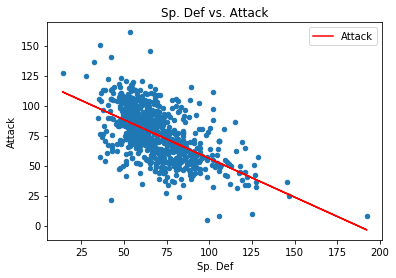

LinregressResult(slope=-0.6450831645147493, intercept=120.48670072818834, rvalue=-0.5719879990539349, pvalue=2.6862414127743344e-66, stderr=0.033847069735152883)

In [10]:
# Compare stats(xAxis, yAxis, Is one of the columns "Total", "#", or "Generation"?)
cols = df.columns
cols = cols.drop(['Type_1', 'Type_2', 'Legendary', 'Generation', '#'])

best_Relationship = ['', '', 0, 0]
for Stat_1 in cols:
    for Stat_2 in cols:
        if (Stat_1 != Stat_2):
            temp = compare_stats(Stat_1, Stat_2, False) 
            if (abs((temp.rvalue*2)/(1-abs(temp.slope))) >= abs((best_Relationship[2]*2)/(abs(1-abs(best_Relationship[3]))))):
                best_Relationship[0] = Stat_1
                best_Relationship[1] = Stat_2
                best_Relationship[2] = temp.rvalue
                best_Relationship[3] = temp.slope

print(best_Relationship[0] + " : " + best_Relationship[1])
compare_stats(best_Relationship[0], best_Relationship[1], True)

According to my program, the strongest relationship is betweeen Special Defense and Attack.  